<a href="https://colab.research.google.com/github/juhernandezd/juhernandezd/blob/main/Taller_Python_Dise%C3%B1o_de_Experimentos_Laura_Marcela_Vargas_Alejo%2C_Juan_Camilo_Hern%C3%A1ndez_David.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El siguiente conjunto de datos agronómicos permite usar la misma entrada para ajustar diferentes modelos haciendo uso esta vez del programa Python usando cualquier plataforma. 

La matriz de datos contiene las variables

y: Latitud

x: Longitud

SMI: Índice de humedad del suelo

NDVI: Indice de vegetación de diferencia normalizado

LST: Temperatura en la superficie del suelo.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import scipy as sc
import folium
import seaborn as sns

import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr

# Convertir el código R en Python para generar un data.frame de manera análoga

In [ ]:
rd.seed(1031178446)
Seqlat = np.arange(-73.30, -73.25, 0.001)
Seqlong = np.arange(5.54, 5.58, 0.001)
latitude = pd.DataFrame.sample(pd.DataFrame(Seqlat), 100, replace = True)
latitude = list(latitude[0])
longitude = pd.DataFrame.sample(pd.DataFrame(Seqlong), 100, replace = True)
longitude = list(longitude [0])

## Data frame 1st part
xy = pd.DataFrame({'lat':latitude, 'lon': longitude})

## Data frame 2nd part
SMI = np.partition (np.random.uniform(0.7,0.95,100), 10)
NDVI = np.partition (np.random.uniform(0.45,0.06,100), 10)
LST= np.partition(26* sc.stats.beta.rvs(0.87, 0.91, size = 100), 10)
#LST = np.partition (np.random.uniform(0.87,0.91, size = 100), 10)





df1 = pd.DataFrame({"Lat":latitude, "Lon":longitude, "SMI":SMI, "NDVI":NDVI, "LST":LST})
df1["Posición"] = np.arange(len(df1))

print(df1)


       Lat    Lon       SMI      NDVI        LST  Posición
0  -73.297  5.550  0.721544  0.074779   1.724476         0
1  -73.290  5.565  0.702014  0.064518   0.117791         1
2  -73.261  5.575  0.716201  0.062288   0.868940         2
3  -73.299  5.545  0.700503  0.075805   1.398851         3
4  -73.272  5.551  0.706784  0.076235   0.433642         4
..     ...    ...       ...       ...        ...       ...
95 -73.254  5.557  0.947348  0.391014  18.332358        95
96 -73.254  5.573  0.945264  0.333693  18.710646        96
97 -73.278  5.563  0.936838  0.382129  24.812776        97
98 -73.282  5.578  0.910911  0.324903  16.559214        98
99 -73.290  5.580  0.913799  0.370467  24.120220        99

[100 rows x 6 columns]


# Graficar la nube de puntos (solo coordenadas)


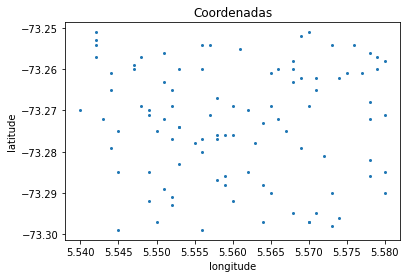

In [ ]:
plt.plot(longitude,latitude, 'o', markersize=2)
plt.title('Coordenadas')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

de la grafica se puede determinar que la dispersion de puntos en el espacio  evaluado es aparentemente normal(sin aglomeraciones de puntos hacia un sector)


# Asignar al gráfico un tamaño al punto de acuerdo con el SMI (graficar)

In [ ]:
df1.plot.scatter(x = 'x', y = 'y', s = 'SMI', c = 'blue')

Text(0, 0.5, 'latitude')

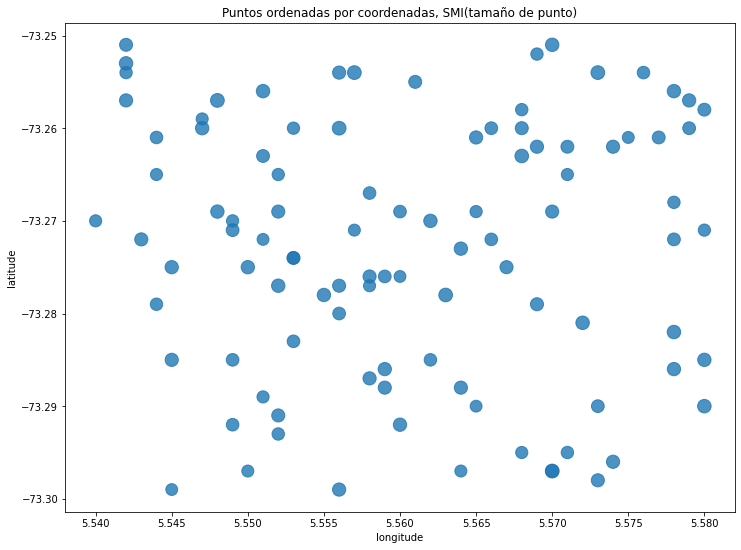

In [ ]:
x = longitude
y = latitude
sizes = SMI*200
plt.figure(figsize=(12,9))
plt.scatter(x, y,s=sizes, alpha= 0.8,
            )
plt.title('Puntos ordenadas por coordenadas, SMI(tamaño de punto)')
plt.xlabel('longitude')
plt.ylabel('latitude')

Al observar el gráfico es posible destacar que, aunque sí hay una diferencia en el tamaño de los puntos, esta no es significativa, por ende se deduce que la humedad del suelo no presenta gran variabilidad a lo largo del terreno.

#Asignar al gráfico un color al punto de acuerdo con el NDVI (graficar)


Text(0, 0.5, 'latitude')

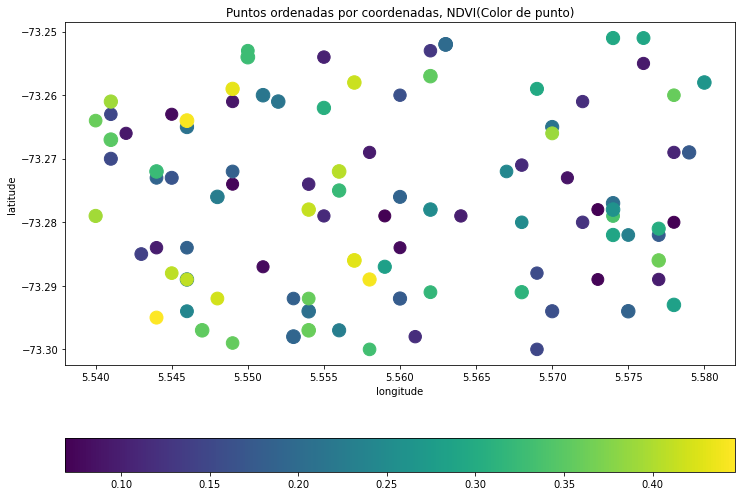

In [ ]:
x = longitude
y = latitude
sizes = SMI*200
markers = LST 

colors = NDVI
plt.figure(figsize=(12,9))
plt.scatter(x, y,s=sizes, alpha= 1, c = colors
            )
plt.colorbar(orientation = "horizontal")
plt.title('Puntos ordenadas por coordenadas, NDVI(Color de punto)')
plt.xlabel('longitude')
plt.ylabel('latitude')

#Asignar al gráfico una forma al punto de acuerdo con el LST(graficar)






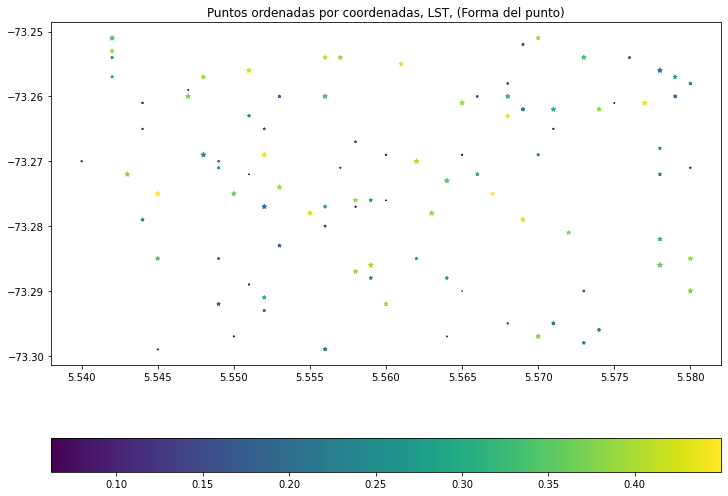

In [ ]:
x = longitude
y = latitude
sizes = SMI*200
markers = LST 

colors = NDVI

plt.figure(figsize=(12,9))
plt.scatter(df1["Lon"], df1["Lat"],c= colors, marker="*",  s=df1["LST"])        
plt.title('Puntos ordenadas por coordenadas, LST, (Forma del punto)')
plt.colorbar(orientation = "horizontal")
plt.show()

En la grafica se observa uniformidad en las figuras de cada punto, lo que significa que la temperatura superficial está generalizada en toda el área de estudio. 

#Buscar alguna librería o programa(en última opción) que permita visualizar los puntos en el mapa de Colombia

In [ ]:
Map = folium.Map(location = [5, -73],zoom_start = 6)
for i in range(len(xy['lat'])):
    folium.Marker(
        location = [xy['lon'][i],xy['lat'][i]],
        popup = f'lon: {xy["lon"][i]}, lat: {xy["lat"][i]}',
        icon = folium.Icon()
    ).add_to(Map)
Map

El área de estudio se encuentra ubicada en la zona rural del municipio de Chivatá, Boyacá, Colombia. 

#Realice un boxplot para SMI

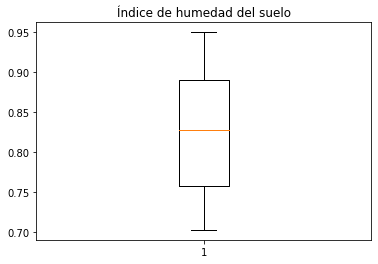

In [ ]:
import matplotlib.pyplot as plt 
SMI
plt.boxplot(SMI)
plt.title("Índice de humedad del suelo")
plt.show()

Se observa que la tendencia central de SMI medido se encuentra en el rango de 0.75 a 0.9 con una mediana cercana a 0.81 y datos atipicos que se encuentran a 0.05 de distancia de la tendencia de los datos 

#Punto 8: Realice un histograma para NDVI


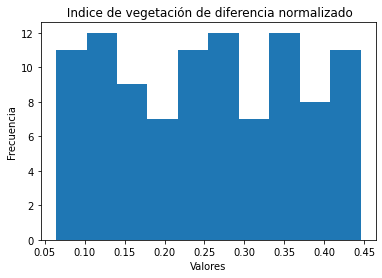

In [ ]:
import matplotlib.pyplot as plt
NDVI
n, bins, patches=plt.hist(NDVI)
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title(" Indice de vegetación de diferencia normalizado")
plt.show()

##Punto 9: Grafique la densidad para LST

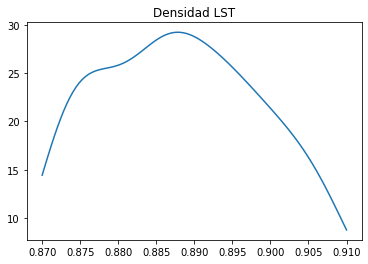

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde
density = kde.gaussian_kde(LST)
x = np.linspace(0.87,0.91,100)
y=density(x)

plt.plot(x, y)
plt.title("Densidad LST")
plt.show()

#Punto 10: Calcule estadísticas descriptivas para las 3 variables


In [ ]:
average = ((df1['NDVI'].mean()), (df1['SMI'].mean()), (df1['LST'].mean()) )
print(average)

med = ((df1['NDVI'].median()), (df1['SMI'].median()), (df1['LST'].median()) )
print(med)

standard_deviation = ((df1['NDVI'].std()), (df1['SMI'].std()), (df1['LST'].std()) )
print(standard_deviation)

(0.2356139978130502, 0.831821236913451, 0.8883842385596691)
(0.21528359392989665, 0.8268831609342852, 0.8883145956781622)
(0.11377936343828629, 0.06660597818928639, 0.01104863532825149)


Al comparar la gráfica de densidad del índice LST y los datos obtenidos a partir de las estadísticas descriptivas es posible observar que efectivamente la media y la mediana de los datos se encuentran en 0,88. Al obserbar el bloxplot del índice SMI se identifican el mismo valor en la mediana de los datos. 

#Punto 11: Fracciones los datos de latitud en 4 cuadrantes y etiquete los puntos como (I,II,II y IV) según el cuadrante y cree esta nueva variable(cuadrante como tipo factor o cadena) y calcule las estadísticas descriptivas por cuadrante

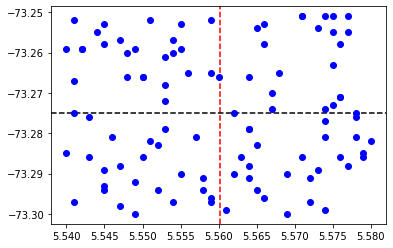

       lat    lon factor       smi      ndvi        lst
0  -73.297  5.559    III  0.708434  0.071198   0.878231
1  -73.299  5.561     IV  0.702650  0.082961   0.576247
2  -73.286  5.576     IV  0.707720  0.064155   0.569529
3  -73.285  5.579     IV  0.708434  0.082174   0.225092
4  -73.279  5.564     IV  0.710149  0.083098   1.432875
..     ...    ...    ...       ...       ...        ...
95 -73.259  5.555     II  0.905112  0.128616  25.947965
96 -73.275  5.541    III  0.947041  0.208563  14.737981
97 -73.279  5.553    III  0.949736  0.172814  17.291700
98 -73.266  5.550     II  0.905884  0.365570  17.208205
99 -73.253  5.555     II  0.926457  0.445567  18.133883

[100 rows x 6 columns]


lat                       ...        lst                      
       count       mean       std  ...        50%        75%        max
factor                             ...                                 
I       21.0 -73.260429  0.008812  ...  14.803699  20.663770  25.448679
II      26.0 -73.260231  0.005631  ...  16.813887  20.877582  25.962961
III     25.0 -73.288960  0.007248  ...  13.132859  19.733304  25.292826
IV      28.0 -73.286750  0.007452  ...   9.315930  16.725264  22.360620

[4 rows x 40 columns]

In [ ]:

lonmedia = np.mean(xy['lon'])
latmedia = np.mean(xy['lat'])
plt.axvline(x=lonmedia, color="red", linestyle="--")
plt.axhline(y=latmedia, color="black", linestyle="--")
plt.plot(xy['lon'], xy['lat'], 'bo')
plt.show()
conditions = [
    (xy['lon'] > lonmedia) & (xy['lat'] > latmedia),
    (xy['lon'] < lonmedia) & (xy['lat'] > latmedia),
    (xy['lon'] < lonmedia) & (xy['lat'] < latmedia),
    (xy['lon'] > lonmedia) & (xy['lat'] < latmedia)
    ]

fac = ['I', 'II', 'III', 'IV']

xy['factor'] = np.select(conditions, fac)

xy['smi']= SMI
xy['ndvi']= NDVI
xy['lst']= LST

print(xy)

xy.groupby('factor').describe()




La distribución de puntos en los cuatro cuadrantes es uniforme. 


#Punto 12: Realice un boxplot para SMI que muestre las cajas de los 4 cuadrantes en el mismo gráfico

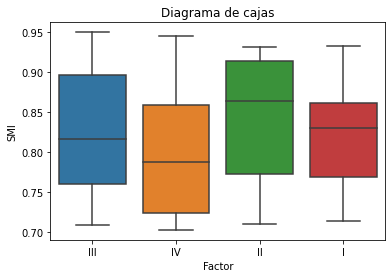

In [ ]:
sns.boxplot(data=xy, x='factor', y='smi')
plt.ylabel('SMI')
plt.xlabel('Factor')
plt.title('Diagrama de cajas')
plt.show()

En el primer cuadrante (Color azul) es posible observar que la tendencia central se encuentra entre 0,76 y 0,90, con mediana aproximadamente de 0,82 y datos atípicos que se encuentran a 0,05 de distancia de la tendencia de datos. En el segundo cuadrante (color amarillo) la tendecia central está ubicada de 0,725 a 0,85, con mediana de 0,78. Datos atípicos superiores de 0,85 a 0,95 e inferiores de 0,70 a 0,72. En el tercer cuadrante (color verde) hay datos atípicos inferiores de 0,71 a 0,77, superiores de 0,92 a 0,94. 

#Punto 13: Realice un histograma múltiple para NDVI que los muestre para los 4 cuadrantes en el mismo gráfico (superponiendo los histogramas)


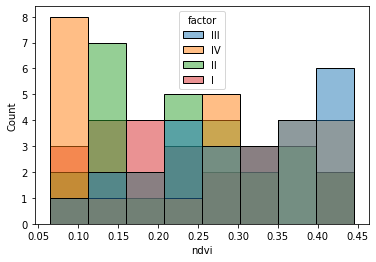

In [ ]:
xy.groupby('factor')
sns.histplot(data=xy,x="ndvi", hue="factor")

#Punto 14: Realice un gráfico de densidades múltiple para LST que los muestre para los 4 cuadrantes en el mismo gráfico (superponiendo las densidades)

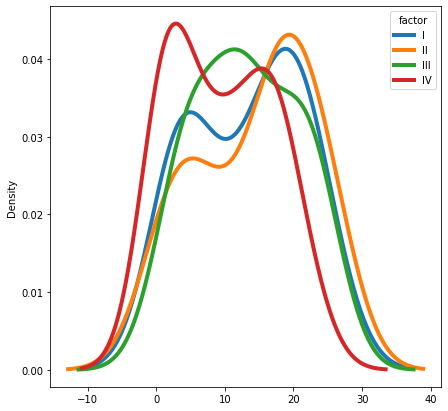

In [ ]:
df1=xy.pivot(columns='factor', values='lst') 

df1.plot.density(figsize = (7, 7), 
                       linewidth = 4) 

#Punto 15: Construya una matriz de correlaciones de Pearson para las 5 variables

In [ ]:
df2=pd.DataFrame({'lat' : latitude, 'lon': longitude,  'lst':LST ,'smi': SMI,'ndvi':NDVI })
df2.corr()
corr= df2.corr ()
corr.style.background_gradient (cmap = 'coolwarm')

,lat,lon,lst,smi,ndvi
lat,1.000000,-0.011129,0.151669,0.138133,-0.193536
lon,-0.011129,1.000000,-0.190946,-0.233013,-0.138016
lst,0.151669,-0.190946,1.000000,0.520963,0.426780
smi,0.138133,-0.233013,0.520963,1.000000,0.436714
ndvi,-0.193536,-0.138016,0.426780,0.436714,1.000000


#Fraccione el gráfico de correlaciones por cuadrante y muestre las 4 figuras en un solo gráfico

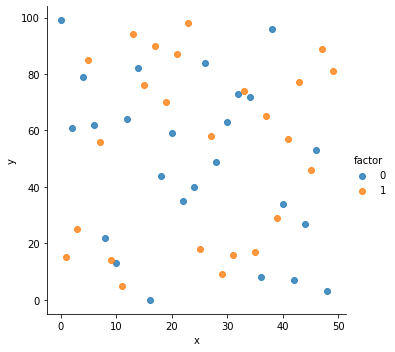

<Figure size 864x864 with 0 Axes>

In [ ]:
x = range(50)
y = random.sample(range(100),50)
cat = [i for i in range(2)]*25
df = pd.DataFrame({"x": x,
                   "y": y,
                  'factor':cat})

sns.lmplot(x= 'x', y = 'y', data = df, fit_reg = False, hue = 'factor')


#sns.lmplot(x=["x"], y=["y"], hue=["factor"], data=[xy])
fig=plt.figure(figsize=[12,12])


#Punto 18: Ajuste algún modelo de regresión lineal simple entre el NDVI (respuesta) y el LST

In [ ]:
import statsmodels.api as sm
from statsmodels.api import add_constant
y = xy['ndvi'] # variable dependiente
x = xy['lst'] # variable independiente 
X = sm.add_constant(x)
lm = (sm.OLS(y, X)).fit()
model_summary=lm.summary()  
print(model_summary) 

KeyError: ignored

#Punto 19: Ajuste un modelo de regresión multiple entre NDVI (respuesta) con  LST y SMI

In [ ]:
y = xy['ndvi'] # variable dependiente
x = xy[{'lst',"smi"}] # variable independiente 
X = sm.add_constant(x)
lm = (sm.OLS(y, X)).fit()
model_summary=lm.summary()  
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:                   ndvi   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     112.6
Date:                Sat, 05 Feb 2022   Prob (F-statistic):           5.17e-26
Time:                        20:54:41   Log-Likelihood:                 140.52
No. Observations:                 100   AIC:                            -275.0
Df Residuals:                      97   BIC:                            -267.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9944      0.565    -10.605      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#Punto 20: Tome una muestra del 80% del data.frame y calcule la matriz de correlaciones por cuadrante. Compare con el caso de todos los datos.

In [ ]:
muestra_xy = df.sample(80)
print(muestra_xy )
muestra_xy.corr()
mc= muestra_xy.corr ()
mc.style.background_gradient (cmap = 'coolwarm')

       lat    lon       smi       lst      ndvi
57 -73.271  5.562  0.802088  0.891104  0.333953
13 -73.293  5.574  0.718990  0.873614  0.119956
51 -73.287  5.569  0.819696  0.890680  0.289659
48 -73.264  5.540  0.799081  0.882219  0.254947
28 -73.298  5.544  0.769495  0.881071  0.189393
..     ...    ...       ...       ...       ...
26 -73.294  5.552  0.752858  0.880042  0.161466
55 -73.298  5.580  0.941538  0.882061  0.214410
15 -73.290  5.551  0.744086  0.876841  0.186260
42 -73.259  5.556  0.844463  0.884464  0.227703
8  -73.276  5.564  0.702282  0.872580  0.091187

[80 rows x 5 columns]


,lat,lon,smi,lst,ndvi
lat,1.000000,0.086755,0.108997,0.269699,0.145886
lon,0.086755,1.000000,0.319017,0.203157,0.173901
smi,0.108997,0.319017,1.000000,0.658007,0.698717
lst,0.269699,0.203157,0.658007,1.000000,0.829588
ndvi,0.145886,0.173901,0.698717,0.829588,1.000000


#Punto 21: Haga un gráfico 3D para las 3 variables ambientales


In [ ]:
import plotly.express as px
f = px.scatter_3d(xy, x = 'smi', 
                    y = 'ndvi', 
                    z = 'lst')
  
f.show()


ValueError: ignored

#Punto 22: Haga un gráfico 3D para las 3 variables ambientales y asigne color según cuadrante

In [ ]:
##Punto 22
fig = px.scatter_3d(xy, x = 'smi', 
                    y = 'ndvi', 
                    z = 'lst',
                    color = 'factor')
  
fig.show()

#Punto 23: Investigue como se construye una matriz de distancias entre todos las coordenadas

In [ ]:
import pandas as pd
from scipy.spatial import distance_matrix
m = np.stack([xy['lat'],xy['lon']], axis=1)
mm=distance_matrix(m, m)
print(mm)

[[0.         0.03420526 0.04257934 ... 0.02844293 0.04365776 0.025     ]
 [0.03420526 0.         0.03996248 ... 0.01603122 0.02332381 0.01431782]
 [0.04257934 0.03996248 0.         ... 0.05093133 0.02202272 0.04675468]
 ...
 [0.02844293 0.01603122 0.05093133 ... 0.         0.03827532 0.00447214]
 [0.04365776 0.02332381 0.02202272 ... 0.03827532 0.         0.03517101]
 [0.025      0.01431782 0.04675468 ... 0.00447214 0.03517101 0.        ]]


#Punto 24: Ubique el centroide de toda la nube de puntos de coordenadas y seleccione solo puntos en una ventana de radio a lo sumo igual a 2/3 de la máxima distancia en la matriz de distancias

(-73.27480999999987, 5.560880000000006)


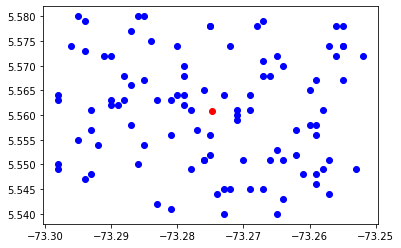

In [ ]:
data= np.array(m)
def centroid(array):
  length=array.shape[0]
  sum_x =np.sum(array[:,0])
  sum_y =np.sum(array[:,1])
  return sum_x /length ,sum_y/length

centroide= centroid(data)
print(centroide)
plt.plot(xy['lat'],xy['lon'],'bo')
plt.scatter(centroide[0],centroide[1],c="r")


#Punto 25: Calcule estadísticas descriptivas en esta ventana circular (dibuje la ventana) y asigne un color diferente a los puntos dentro de esta ventana

(-73.27480999999987, 5.560880000000006)


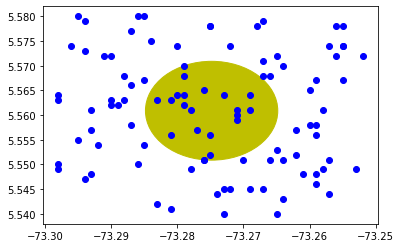

In [ ]:
centroide = centroid(data)
print(centroide)
circle = plt.Circle((centroide), 0.01, color='y')
fig, ax = plt.subplots()
ax.add_patch(circle)

plt.plot(xy['lat'],xy['lon'],'bo')
plt.scatter(centroide[0],centroide[1],c="r")

#Punto 26: Suponga que queremos hacer un análisis de varianza para comparar la media de SMI por cuadrante. Se pide primero tomar aleatoriamente 10 datos de cada cuadrante y construir un nuevo data.frame con todas las variables pero solo con 40 filas. Utilice el análisis de varianza (modulo pingouin si desea) para comparar el índice medio de los 4 cuadrante

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod= ols("smi ~ factor" ,data=dx3).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)
residuales=mod.resid
print(residuales)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


NameError: ignored

#Punto 27: Use alguna librería que permita extraer los residuales del modelo y haga su histograma

#Punto 28: Utilice la prueba de Shapiro para probar normalidad en los residuales

#Punto 29: Utilice la prueba de Levine para probar igualdad de varianzas de los residuales

#Punto 30: Investigue cómo se calcula el índice de Moran y pruebe si los residuales muestran dependencia atribuible a la autocorrelación espacial entre ellos.
